# Augmentation

In [1]:
import sys
sys.path.append('../../')

from dl.data.object import datasets
from dl.data.object import transforms, target_transforms, augmentations, utils

%matplotlib notebook
import matplotlib.pyplot as plt
from dl.models.ssd.core.inference import toVisualizeRectangleRGBimg

# Photometric distortions

## Random Brightness

[[ 84  45 300 297]]
(84, 45) (300, 297)


<IPython.core.display.Javascript object>


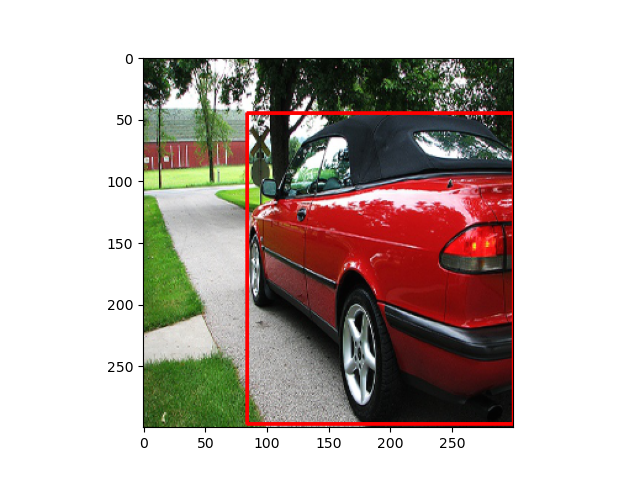

[[ 31 149 100 299]]
(31, 149) (100, 299)


<IPython.core.display.Javascript object>


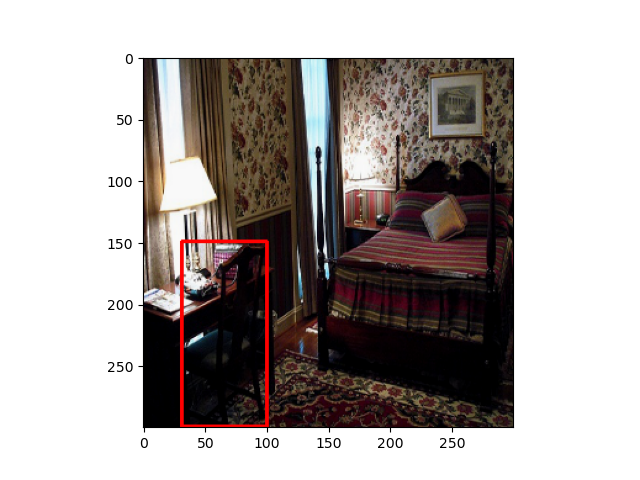

[[ 65  57 193 142]]
(65, 57) (193, 142)


<IPython.core.display.Javascript object>


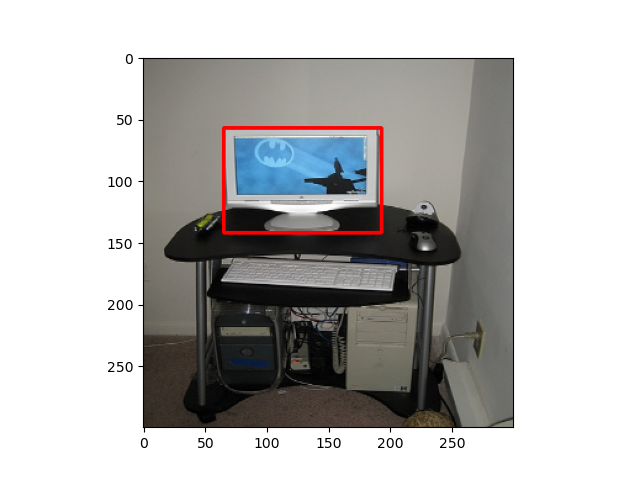

[[  8  58 300 205]]
(8, 58) (300, 205)


<IPython.core.display.Javascript object>


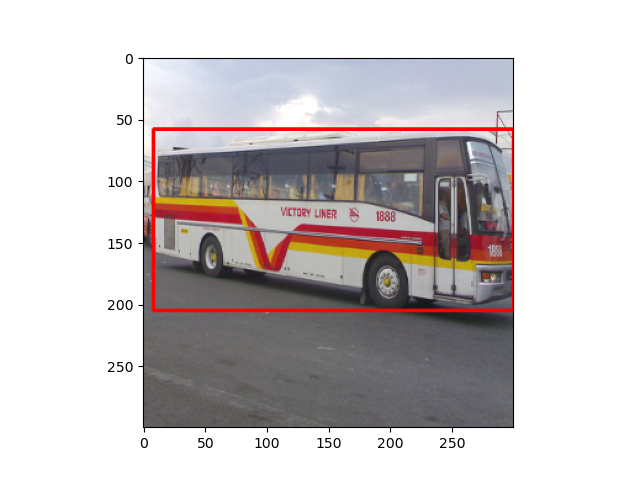

In [2]:
augmentation = augmentations.RandomBrightness(p=1)

transform = transforms.Compose(
    [transforms.Resize((300, 300)),
     transforms.ToTensor()]
)
target_transform = target_transforms.Compose(
    [target_transforms.Corners2Centroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums, add_background=True),
     target_transforms.ToTensor()]
)
train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Contrast

[[ 84  45 300 297]]
(84, 45) (300, 297)


<IPython.core.display.Javascript object>


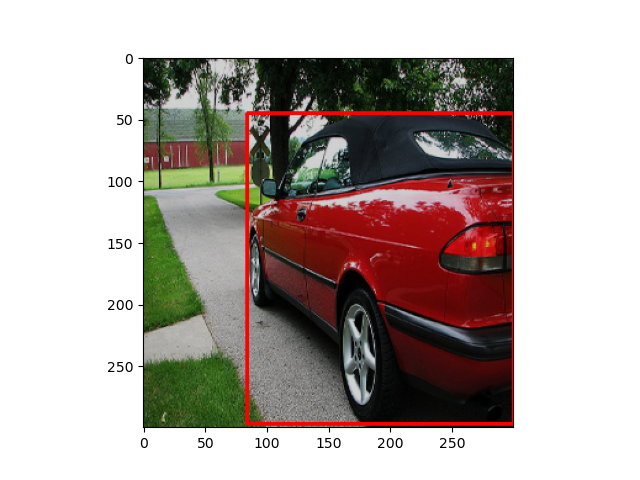

[[ 31 149 100 299]]
(31, 149) (100, 299)


<IPython.core.display.Javascript object>


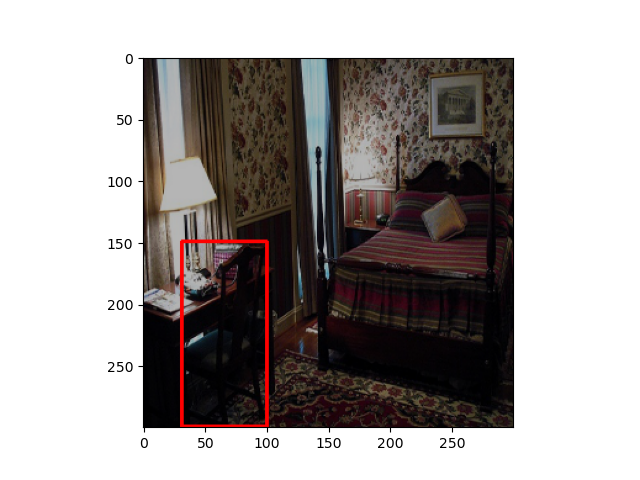

[[ 65  57 193 142]]
(65, 57) (193, 142)


<IPython.core.display.Javascript object>


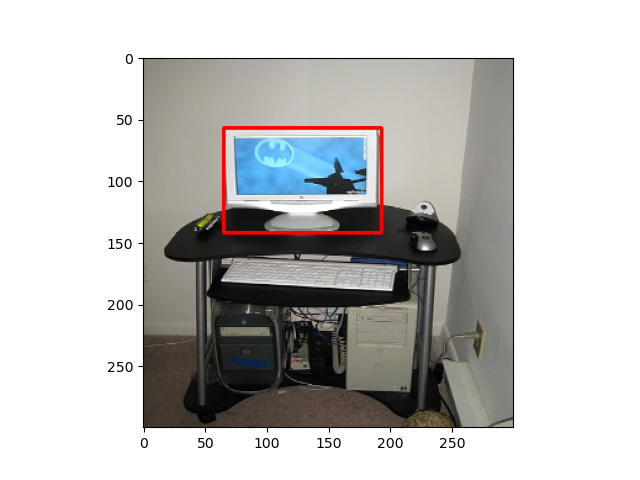

[[  8  58 300 205]]
(8, 58) (300, 205)


<IPython.core.display.Javascript object>


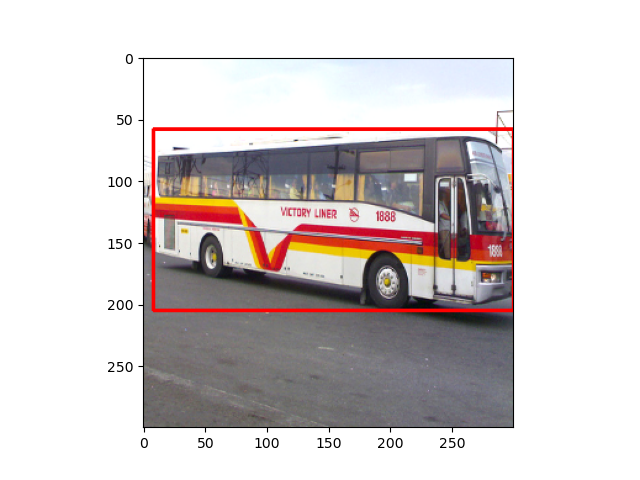

In [3]:
augmentation = augmentations.RandomContrast(p=1)

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Hue

[[ 84  45 300 297]]
(84, 45) (300, 297)


<IPython.core.display.Javascript object>


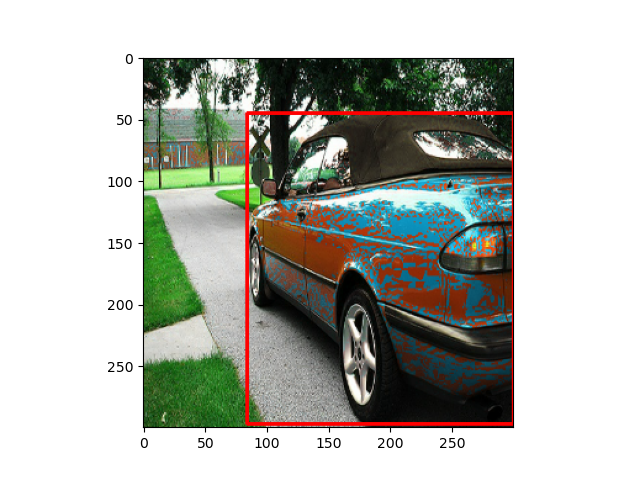

[[ 31 149 100 299]]
(31, 149) (100, 299)


<IPython.core.display.Javascript object>


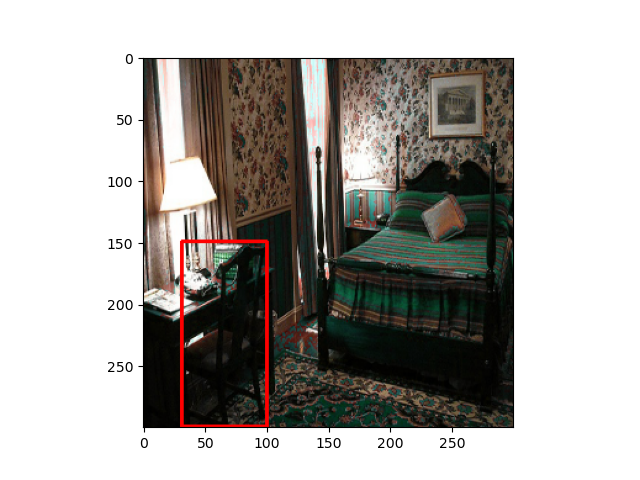

[[ 65  57 193 142]]
(65, 57) (193, 142)


<IPython.core.display.Javascript object>


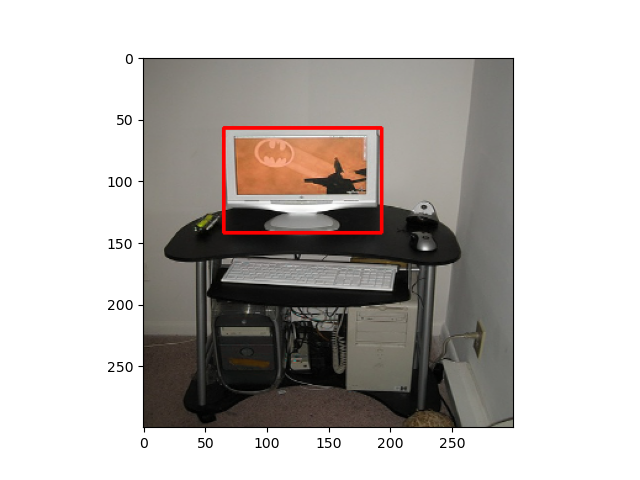

[[  8  58 300 205]]
(8, 58) (300, 205)


<IPython.core.display.Javascript object>


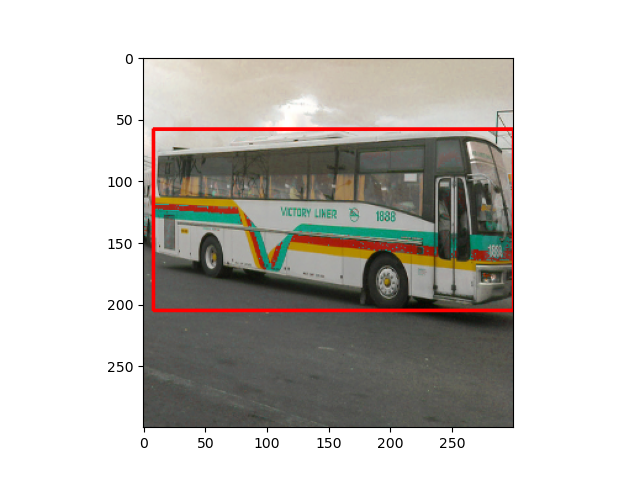

In [4]:
augmentation = augmentations.Compose([
    augmentations.ConvertImgOrder(src='rgb', dst='hsv'),
    augmentations.RandomHue(p=1),
    augmentations.ConvertImgOrder(src='hsv', dst='rgb')
])

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Saturation

[[ 84  45 300 297]]
(84, 45) (300, 297)


<IPython.core.display.Javascript object>


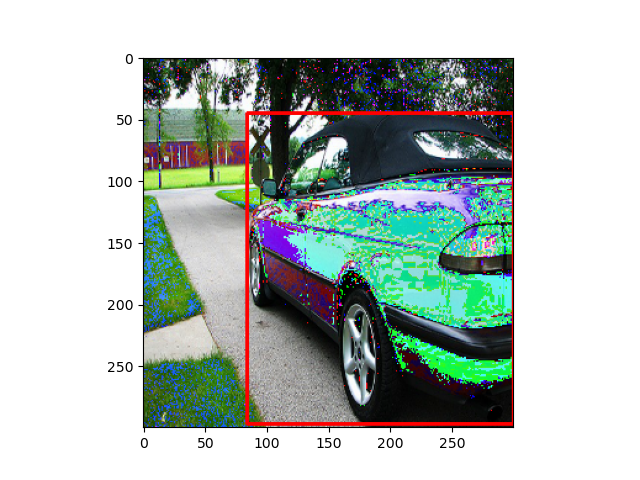

[[ 31 149 100 299]]
(31, 149) (100, 299)


<IPython.core.display.Javascript object>


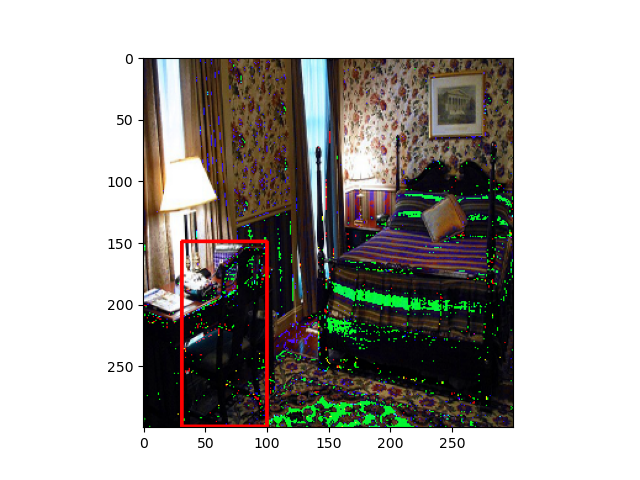

[[ 65  57 193 142]]
(65, 57) (193, 142)


<IPython.core.display.Javascript object>


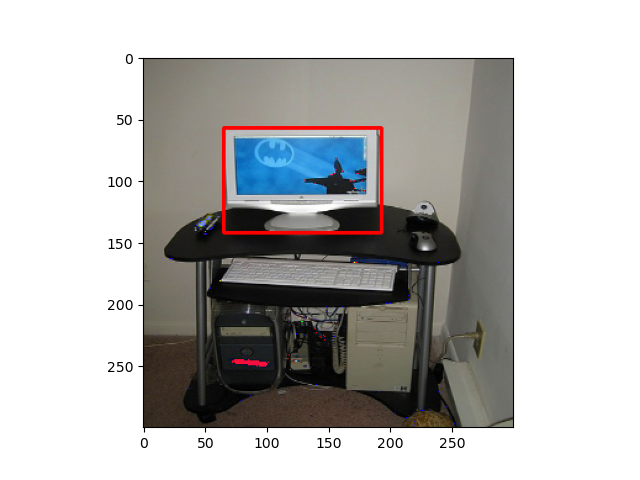

[[  8  58 300 205]]
(8, 58) (300, 205)


<IPython.core.display.Javascript object>


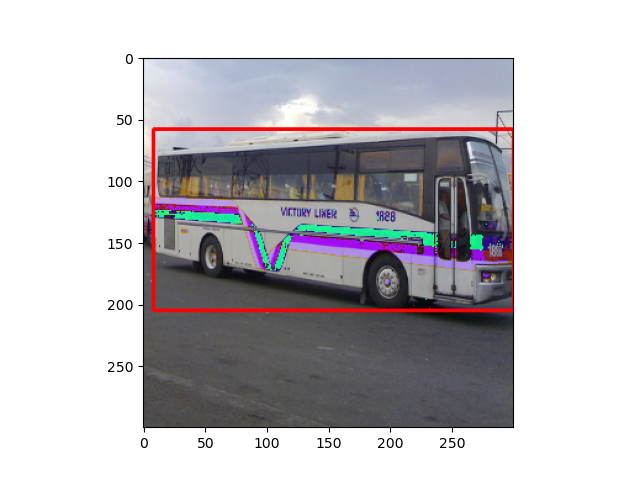

In [5]:
augmentation = augmentations.Compose([
    augmentations.ConvertImgOrder(src='rgb', dst='hsv'),
    augmentations.RandomSaturation(p=1),
    augmentations.ConvertImgOrder(src='hsv', dst='rgb')
])

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=True)

    plt.figure()
    plt.imshow(img)

## Lighting Noise

[[ 84  45 300 297]]
(84, 45) (300, 297)


<IPython.core.display.Javascript object>


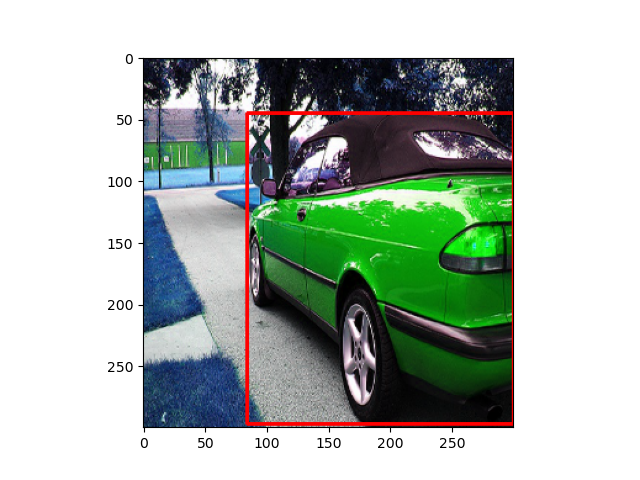

[[ 31 149 100 299]]
(31, 149) (100, 299)


<IPython.core.display.Javascript object>


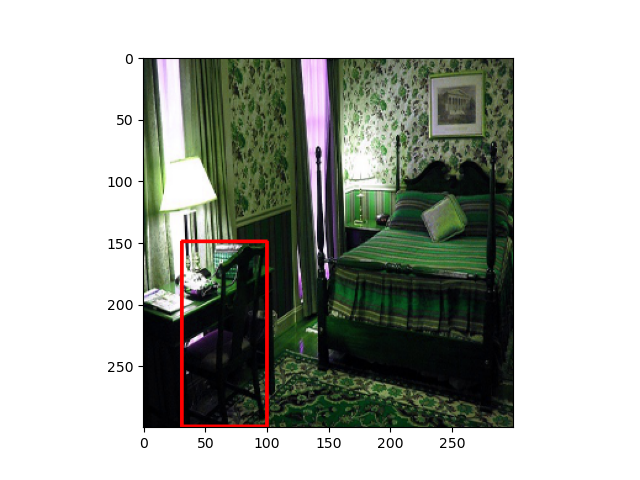

[[ 65  57 193 142]]
(65, 57) (193, 142)


<IPython.core.display.Javascript object>


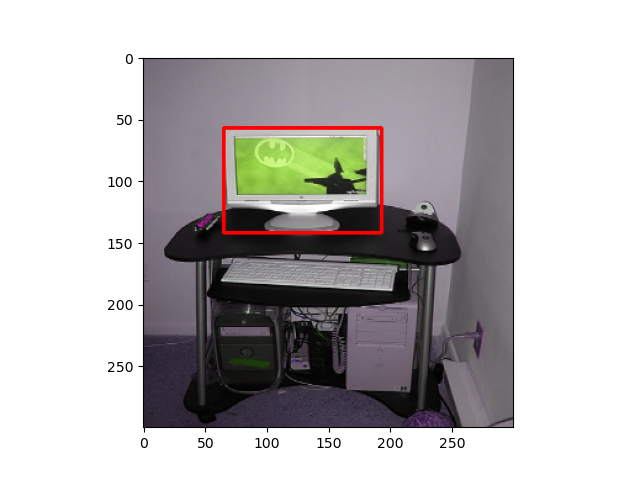

[[  8  58 300 205]]
(8, 58) (300, 205)


<IPython.core.display.Javascript object>


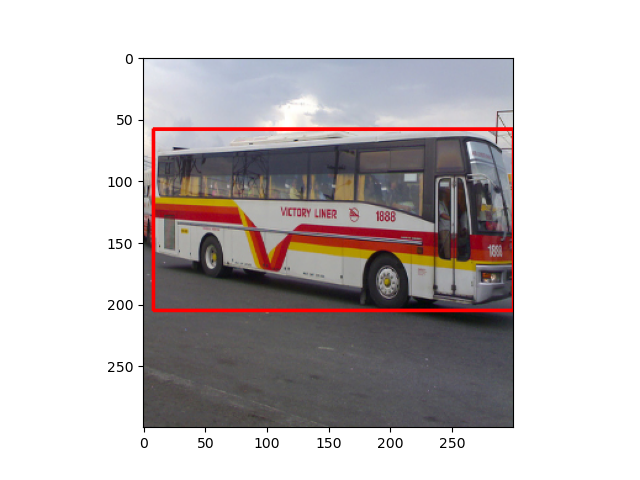

In [6]:
augmentation = augmentations.RandomLightingNoise(p=1)

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)